## Simulate auto-correlated process with large noise

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [184]:
gamma=0.5

baseline=20
sigma=1000
data_length=30

def simulate(data_length,baseline,sigma):
    z=np.zeros(data_length)
    z[0]=10
    for i in range(1,len(z)):
        f=np.random.normal(baseline,sigma,1)
        z[i]=gamma*z[i-1]+f
    
    # do regression
    y=z[1:len(z)]
    x=z[0:len(z)-1]
    x_ = sm.add_constant(x)
    results = sm.OLS(y, x_).fit()
    
    pvalue=results.f_pvalue
    return z,pvalue

In [187]:
z_all=[]
p_values=[]
for seed in range(10):
    z,pvalue=simulate(data_length,baseline,sigma)
    z_all.append(z)
    p_values.append(pvalue)
    #plt.plot(z)
p_values

[0.08275213731703743,
 0.10635822575838916,
 0.09427670131493576,
 0.04232970284809107,
 0.0068402683243675285,
 0.023596968958672037,
 0.10386356101388397,
 0.00380723884675332,
 0.00040812270508822573,
 0.0010029806184993254]

[0.00523702887569888,
 0.0006037758106108185,
 0.00014719497443065052,
 0.018544247682700212,
 2.180134680796697e-09,
 0.0007853470449821066,
 0.0005157808435996531,
 0.03347072689716005,
 7.378465559407834e-08,
 0.0020168155598124823]

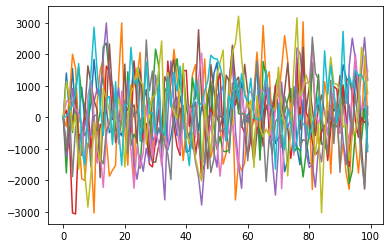

In [190]:
data_length=100
z_all=[]
p_values=[]
for seed in range(10):
    z,pvalue=simulate(data_length,baseline,sigma)
    z_all.append(z)
    p_values.append(pvalue)
    plt.plot(z)
p_values


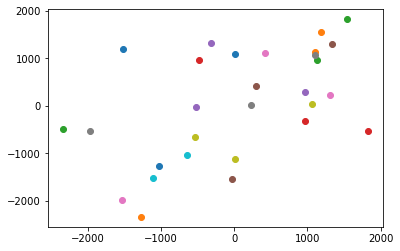

In [186]:
for i in range(1,len(z)):
    plt.scatter(z[i-1],z[i])

In [129]:
import statsmodels.api as sm

In [145]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     10.23
Date:                Tue, 14 Jun 2022   Prob (F-statistic):            0.00352
Time:                        22:45:08   Log-Likelihood:                -178.51
No. Observations:                  29   AIC:                             361.0
Df Residuals:                      27   BIC:                             363.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1613     22.210      0.187      0.8